In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker as ticker


We are looking to find the studios whose average profit margin is highest. To do this we will first import a table of movie studios, and later on we will join it with a second table that contains budget and worldwide gross information.

Here we load the first table.

In [94]:
df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [3]:
len(df)

3387

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


How many studios do we have in the dataset?

In [13]:
len(df.studio.unique())

258

In [95]:
df1 = df.groupby('studio').count()
df1.head()





,title,domestic_gross,foreign_gross,year
studio,,,,
3D,1,1,1,1
A23,2,2,0,2
A24,49,49,19,49
ADC,2,2,0,2
AF,6,6,2,6


Here we select only those studios that have created more than 3 titles, since we have an abundance of studios in our dataset.

In [96]:
studio_counts = df['studio'].value_counts()
studio_list = studio_counts[studio_counts > 3].index.tolist()
studio_df = df[df['studio'].isin(studio_list)]

studiodf2= studio_df.groupby('studio').count()
studiodf2

,title,domestic_gross,foreign_gross,year
studio,,,,
A24,49,49,19,49
AF,6,6,2,6
ATO,4,4,2,4
Abr.,10,10,2,10
Alc,5,5,0,5
Amazon,7,7,5,7
Ampl.,5,5,1,5
Anch.,18,18,8,18
Annapurna,6,6,5,6


In [6]:
len(studiodf2)

101

That is much more manageable. Now we will make a new dataframe that only contains the list of studios who have created more than 3 films in our dataset.

In [97]:
pd.options.display.max_rows = 4000

updatedstudiodf = studio_df.loc[(studio_df['studio'] == 'BV') | (studio_df['studio'] == 'WB') |(studio_df['studio'] == 'A24')
              |(studio_df['studio'] == 'AF') |(studio_df['studio'] == 'ATO')
              |(studio_df['studio'] == 'Alc') |(studio_df['studio'] == 'Amazon') |(studio_df['studio'] == 'Ampl.')
             |(studio_df['studio'] == 'Anch.') |(studio_df['studio'] == 'Annapurna')  |(studio_df['studio'] == 'BG')
             |(studio_df['studio'] == 'BH Tilt') |(studio_df['studio'] == 'BST') 
            |(studio_df['studio'] == 'CBS') |(studio_df['studio'] == 'CGId') |(studio_df['studio'] == 'CJ')
            |(studio_df['studio'] == 'CL') |(studio_df['studio'] == 'Cdgm.')
            |(studio_df['studio'] == 'Cohen') |(studio_df['studio'] == 'Crnth') |(studio_df['studio'] == 'Distrib.')
            |(studio_df['studio'] == 'Drft.') |(studio_df['studio'] == 'EC') |(studio_df['studio'] == 'ENTMP')
            |(studio_df['studio'] == 'EOne') |(studio_df['studio'] == 'Eros')
            |(studio_df['studio'] == 'FCW') |(studio_df['studio'] == 'FD') |(studio_df['studio'] == 'FIP')
            |(studio_df['studio'] == 'FM') |(studio_df['studio'] == 'FR') |(studio_df['studio'] == 'FRun')
         |(studio_df['studio'] == 'Fathom') |(studio_df['studio'] == 'Focus')
        |(studio_df['studio'] == 'Fox') |(studio_df['studio'] == 'FoxS') |(studio_df['studio'] == 'Free')
        |(studio_df['studio'] == 'GK') |(studio_df['studio'] == 'Gold.') |(studio_df['studio'] == 'Grav.')
    |(studio_df['studio'] == 'IFC') |(studio_df['studio'] == 'IM') |(studio_df['studio'] == 'Icar.')
    |(studio_df['studio'] == 'Imag.') |(studio_df['studio'] == 'Jan.') |(studio_df['studio'] == 'KL')
    |(studio_df['studio'] == 'Kino') |(studio_df['studio'] == 'LG/S') |(studio_df['studio'] == 'LGF')
    |(studio_df['studio'] == 'LGP') |(studio_df['studio'] == 'Lorb.')|(studio_df['studio'] == 'MBox') |(studio_df['studio'] == 'MNE')
    |(studio_df['studio'] == 'Magn.') |(studio_df['studio'] == 'Mont.') |(studio_df['studio'] == 'NGE')
    |(studio_df['studio'] == 'Neon') |(studio_df['studio'] == 'ORF') |(studio_df['studio'] == 'Orch.')
    |(studio_df['studio'] == 'Osci.') |(studio_df['studio'] == 'Over.') |(studio_df['studio'] == 'P/DW')
    |(studio_df['studio'] == 'PFR') |(studio_df['studio'] == 'PNT') |(studio_df['studio'] == 'Par.')
    |(studio_df['studio'] == 'ParV')  |(studio_df['studio'] == 'RAtt.') |(studio_df['studio'] == 'RTWC')
    |(studio_df['studio'] == 'Rela.') |(studio_df['studio'] == 'Relbig.') |(studio_df['studio'] == 'Rialto')
    |(studio_df['studio'] == 'SD') |(studio_df['studio'] == 'SGem') |(studio_df['studio'] == 'SM')
    |(studio_df['studio'] == 'SPC') |(studio_df['studio'] == 'STX') |(studio_df['studio'] == 'Scre.')
    |(studio_df['studio'] == 'Sony') |(studio_df['studio'] == 'Strand') |(studio_df['studio'] == 'Sum.')
    |(studio_df['studio'] == 'TFA') |(studio_df['studio'] == 'TriS') |(studio_df['studio'] == 'Trib.')
    |(studio_df['studio'] == 'UTV') |(studio_df['studio'] == 'Uni.') |(studio_df['studio'] == 'VE')
    |(studio_df['studio'] == 'VPD') |(studio_df['studio'] == 'Vari.') |(studio_df['studio'] == 'Vita.')
    |(studio_df['studio'] == 'W/Dim.') |(studio_df['studio'] == 'WB(NL)') |(studio_df['studio'] == 'WGUSA')
    |(studio_df['studio'] == 'WHE') |(studio_df['studio'] == 'Wein.') |(studio_df['studio'] == 'Yash')
    |(studio_df['studio'] == 'Zeit.')
             
             ]

updatedstudiodf
 #df.loc[(df["B"] > 50) & (df["C"] == 900), "A"]

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [8]:
len(updatedstudiodf)

3057

We still have plenty of data after dropping some of the studios.

In [9]:
updatedstudiodf.nunique()

title             3056
studio              94
domestic_gross    1692
foreign_gross     1128
year                 9
dtype: int64

Here is an example of how we searched for specific titles that a given studio had made. If we were not sure which abbreviation belonged to which studio, this became an easy Google search using the movie titles.

In [98]:
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Yash']



,title,studio,domestic_gross,foreign_gross,year
301,Band Baaja Baaraat,Yash,43800.0,60700,2010
306,Badmaash Company,Yash,NaN,64400,2010
624,Mere Brother Ki Dulhan,Yash,496000.0,NaN,2011
946,Jab Tak Hai Jaan,Yash,3000000.0,NaN,2012
957,Ek Tha Tiger,Yash,2300000.0,NaN,2012
1085,Jodi Breakers,Yash,52600.0,NaN,2012
1204,Dhoom 3,Yash,8000000.0,80000000,2013
2089,Piku,Yash,1800000.0,NaN,2015
2128,Detective Byomkesh Bakshy,Yash,579000.0,NaN,2015
2406,Sultan,Yash,6200000.0,81100000,2016


Now we will rename some studios, to make it clear what the abbreviations refer to.

In [99]:
updatedstudiodf.loc[updatedstudiodf['studio'] == 'BV','studio'] = 'Buena Vista'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'ATO','studio'] = 'Art Takes Over Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Alc','studio'] = 'Alchemy'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Ampl.','studio'] = 'Amplify'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Anch.','studio'] = 'Anchor Bay Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'BG','studio'] = 'Big Green Pictures'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'BST','studio'] = 'Bleecker Street'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'CJ','studio'] = 'CJ Entertainment'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'CL','studio'] = 'CL Western Town'


updatedstudiodf.loc[updatedstudiodf['studio'] == 'Cdgm.','studio'] = 'Cinedigm'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Cohen','studio'] = 'Cohen Media Group'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Crnth','studio'] = 'Corinth Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Distrib.','studio'] = 'Mars Distribution'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Drft.','studio'] = 'Drafthouse Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'EC','studio'] = 'EuropaCorp'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'ENTMP','studio'] = 'Entertainment Studios Motion Pictures'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'EOne','studio'] = 'Entertainment One Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Eros','studio'] = 'Eros International'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'FCW','studio'] = 'Focus World'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'FD','studio'] = 'FilmDistrict'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'FIP','studio'] = 'Fox Star Studios'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'FM','studio'] = 'Film Movement'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'FR','studio'] = 'FilmRise'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'FRun','studio'] = 'First Run Features'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'Fathom','studio'] = 'Fathom Events'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Focus','studio'] = 'Focus Features'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'FoxS','studio'] = 'Fox Searchlight'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Free','studio'] = 'Freestyle Releasing'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'GK','studio'] = 'GKIDS Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Gold.','studio'] = 'MGM'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Grav.','studio'] = 'Gravitas Ventures'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'IFC','studio'] = 'IFC Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'IM','studio'] = 'Indomina Releasing'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Icar.','studio'] = 'Icarus Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Imag.','studio'] = 'Image Entertainment'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Jan.','studio'] = 'Janus Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'KL','studio'] = 'Kino Lorber'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'LG/S','studio'] = 'Lionsgate/Summit Entertainment'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'LGF','studio'] = 'Lionsgate'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'LGP','studio'] = 'Lionsgate Premiere'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Lorb.','studio'] = 'Lorber Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'MNE','studio'] = 'Millenium Entertainment'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Magn.','studio'] = 'Magnolia Pictures'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Mont.','studio'] = 'Monterey Media'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'NGE','studio'] = 'National Geographic Entertainment'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'ORF','studio'] = 'Open Road Films'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'Orch.','studio'] = 'The Orchard'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Osci.','studio'] = 'Oscilloscope Laboratories'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Over.','studio'] = 'Overture'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'P/DW','studio'] = 'Pixar/Dreamworks'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'PFR','studio'] = 'Pure Flix'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'PNT','studio'] = 'Pantelion Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Par.','studio'] = 'Paramount'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'ParV','studio'] = 'Paramount/Viacom'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'RAtt.','studio'] = 'Roadside Attractions'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'RTWC','studio'] = 'Radius-TWC'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'Rela.','studio'] = 'Relativity Media'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Relbig.','studio'] = 'Reliance Big Pictures'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'SD','studio'] = 'Submarine Deluxe'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'SGem','studio'] = 'Screen Gems'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'SM','studio'] = 'Starz Digital Media'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'SPC','studio'] = 'Sony Pictures Classics'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Scre.','studio'] = 'Screen Media Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Sum.','studio'] = 'Sumbadhat Productions'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'TFA','studio'] = 'The Film Arcade'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'TriS','studio'] = 'Sony Pictures'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'Trib.','studio'] = 'Tribeca Film'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Uni.','studio'] = 'Universal'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'VE','studio'] = 'Vertical Entertainment'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'VPD','studio'] = 'Viacom18 Motion Pictures'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Vari.','studio'] = 'VVariance Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Vita.','studio'] = 'Vitagraph Films'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'W/Dim.','studio'] = 'Wein/Dimension'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'WGUSA','studio'] = 'Well Go USA Inc.'

updatedstudiodf.loc[updatedstudiodf['studio'] == 'WHE','studio'] = 'Wrekin Hill Entertainment'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Wein.','studio'] = 'Weinstein Company'
updatedstudiodf.loc[updatedstudiodf['studio'] == 'Yash','studio'] = 'Yash Raj Films'


updatedstudiodf

/Users/wildalaska/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010
1,Alice in Wonderland (2010),Buena Vista,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.0,398000000,2010
6,Iron Man 2,Paramount,312400000.0,311500000,2010
7,Tangled,Buena Vista,200800000.0,391000000,2010
8,Despicable Me,Universal,251500000.0,291600000,2010
9,How to Train Your Dragon,Pixar/Dreamworks,217600000.0,277300000,2010


In [30]:
len(updatedstudiodf)

3057

Now we will import our second table which contains the budget and worldwide gross data that we need.

In [100]:
budgetsdf = pd.read_csv('IMDb_budgets.csv')
budgetsdf.head()

,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Avengers: Endgame,2019,8.4,PG-13,181,"Action, Adventure, Drama","Apr 23, 2019",400000000,858373000,2797800564
1,Avatar,2009,7.8,PG-13,162,"Action, Adventure, Fantasy","Dec 17, 2009",237000000,760507625,2788701337
2,Black Panther,2018,7.3,PG-13,134,"Action, Adventure, Sci-Fi","Feb 13, 2018",200000000,700059566,1346103376
3,Avengers: Infinity War,2018,8.4,PG-13,149,"Action, Adventure, Sci-Fi","Apr 25, 2018",300000000,678815482,2048359754
4,Titanic,1997,7.8,PG-13,194,"Drama, Romance","Dec 18, 1997",200000000,659363944,2208208395


In [ ]:
We join the two tables.

In [101]:
studioplusbudgetsdf = pd.merge(updatedstudiodf, budgetsdf, left_on = 'title', right_on='Movie') 
studioplusbudgetsdf.head()


,title,studio,domestic_gross,foreign_gross,year,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Domestic Gross,Worldwide Gross
0,Toy Story 3,Buena Vista,415000000.0,652000000,2010,Toy Story 3,2010,8.3,G,103,"Animation, Adventure, Comedy","Jun 18, 2010",200000000,415004880,1068879522
1,Inception,WB,292600000.0,535700000,2010,Inception,2010,8.8,PG-13,148,"Action, Adventure, Sci-Fi","Jul 16, 2010",160000000,292576195,832551961
2,Shrek Forever After,Pixar/Dreamworks,238700000.0,513900000,2010,Shrek Forever After,2010,6.3,PG,93,"Animation, Adventure, Comedy","May 21, 2010",165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sumbadhat Productions,300500000.0,398000000,2010,The Twilight Saga: Eclipse,2010,5.0,PG-13,124,"Adventure, Drama, Fantasy","Jun 30, 2010",68000000,300531751,706102828
4,Iron Man 2,Paramount,312400000.0,311500000,2010,Iron Man 2,2010,7.0,PG-13,124,"Action, Adventure, Sci-Fi","May 7, 2010",170000000,312433331,621156389


For the purposes of this experiment, we will only be using the columns Movie, studio, Production Budget, and Worldwide Gross. We will also drop the columns that we do not need which may be confusing, including both domestic gross columns, the title, year, and foreign gross, since these are redundant.

In [102]:
studioplusbudgetsdf.drop(columns = {'title','domestic_gross','Domestic Gross','foreign_gross','year'}, inplace = True)
studioplusbudgetsdf.head()



,studio,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Worldwide Gross
0,Buena Vista,Toy Story 3,2010,8.3,G,103,"Animation, Adventure, Comedy","Jun 18, 2010",200000000,1068879522
1,WB,Inception,2010,8.8,PG-13,148,"Action, Adventure, Sci-Fi","Jul 16, 2010",160000000,832551961
2,Pixar/Dreamworks,Shrek Forever After,2010,6.3,PG,93,"Animation, Adventure, Comedy","May 21, 2010",165000000,756244673
3,Sumbadhat Productions,The Twilight Saga: Eclipse,2010,5.0,PG-13,124,"Adventure, Drama, Fantasy","Jun 30, 2010",68000000,706102828
4,Paramount,Iron Man 2,2010,7.0,PG-13,124,"Action, Adventure, Sci-Fi","May 7, 2010",170000000,621156389


We'll rename a couple columns with spelling and spacing issues.

In [117]:
studioplusbudgetsdf.rename(columns = {'studio':'Studio','Worldwide Gross ':'Worldwide Gross' }, inplace = True) 
studioplusbudgetsdf.head()


,Studio,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Worldwide Gross,Profit Margin
0,Buena Vista,Toy Story 3,2010,8.3,G,103,"Animation, Adventure, Comedy","Jun 18, 2010",200000000,1068879522,868879522
1,WB,Inception,2010,8.8,PG-13,148,"Action, Adventure, Sci-Fi","Jul 16, 2010",160000000,832551961,672551961
2,Pixar/Dreamworks,Shrek Forever After,2010,6.3,PG,93,"Animation, Adventure, Comedy","May 21, 2010",165000000,756244673,591244673
3,Sumbadhat Productions,The Twilight Saga: Eclipse,2010,5.0,PG-13,124,"Adventure, Drama, Fantasy","Jun 30, 2010",68000000,706102828,638102828
4,Paramount,Iron Man 2,2010,7.0,PG-13,124,"Action, Adventure, Sci-Fi","May 7, 2010",170000000,621156389,451156389


In [72]:
len(studioplusbudgetsdf)

994

Now we will make a new column for the profit of each movie, which will be equal to the Worldwide Gross minus the Production Budget, divided by the worldwide gross.

In [143]:
studioplusbudgetsdf['Profit'] = studioplusbudgetsdf['Worldwide Gross'] - studioplusbudgetsdf['Production Budget']
studioplusbudgetsdf['Profit Margin'] = studioplusbudgetsdf['Profit']/studioplusbudgetsdf['Worldwide Gross']
    
studioplusbudgetsdf.head()                                                                


#df['newcol'] = df.apply(lambda row: row['firstcolval'] * row['secondcolval'], axis=1)

                        
                                       

,Studio,Movie,Year,IMDb,Rating,Runtime,Genre,Release Date,Production Budget,Worldwide Gross,Profit Margin,Profit,Studio2
0,Buena Vista,Toy Story 3,2010,8.3,G,103,"Animation, Adventure, Comedy","Jun 18, 2010",200000000,1068879522,0.812888,868879522,Buena Vista
1,WB,Inception,2010,8.8,PG-13,148,"Action, Adventure, Sci-Fi","Jul 16, 2010",160000000,832551961,0.807820,672551961,WB
2,Pixar/Dreamworks,Shrek Forever After,2010,6.3,PG,93,"Animation, Adventure, Comedy","May 21, 2010",165000000,756244673,0.781817,591244673,Pixar/Dreamworks
3,Sumbadhat Productions,The Twilight Saga: Eclipse,2010,5.0,PG-13,124,"Adventure, Drama, Fantasy","Jun 30, 2010",68000000,706102828,0.903697,638102828,Sumbadhat Productions
4,Paramount,Iron Man 2,2010,7.0,PG-13,124,"Action, Adventure, Sci-Fi","May 7, 2010",170000000,621156389,0.726317,451156389,Paramount


Now we will group by Studio to see the average Profit Margin for each studio.

In [199]:
profit_by_studiodf = studioplusbudgetsdf.groupby('Studio').mean()
profit_by_studiodf                                                               


,Year,IMDb,Runtime,Production Budget,Worldwide Gross,Profit Margin,Profit
Studio,,,,,,,
A24,2015.500000,7.014286,107.071429,6.453571e+06,1.956769e+07,0.142588,1.311412e+07
Alchemy,2015.000000,5.200000,112.000000,1.000000e+07,1.610970e+05,-61.074402,-9.838903e+06
Amazon,2018.000000,6.800000,152.000000,2.000000e+07,7.023292e+06,-1.847667,-1.297671e+07
Anchor Bay Films,2012.500000,6.075000,107.750000,1.343750e+07,3.957351e+06,-37.247812,-9.480149e+06
Annapurna,2017.800000,6.960000,127.400000,3.180000e+07,2.672190e+07,-0.662769,-5.078095e+06
Art Takes Over Films,2010.000000,6.200000,108.000000,1.250000e+07,2.272186e+06,-4.501310,-1.022781e+07
BH Tilt,2017.000000,5.775000,93.750000,3.250000e+06,1.342012e+07,0.715462,1.017012e+07
Big Green Pictures,2016.000000,5.957143,105.714286,1.927143e+07,1.985968e+07,-0.427294,5.882503e+05
Bleecker Street,2016.333333,7.066667,111.166667,1.008333e+07,1.805976e+07,0.379811,7.976422e+06


We will now plot each Studio to its corresponding Average Profit Margin.

These are the top 30 studios that are recommended to model best practices against.

Text(0, 0.5, 'Average Profit Margin')

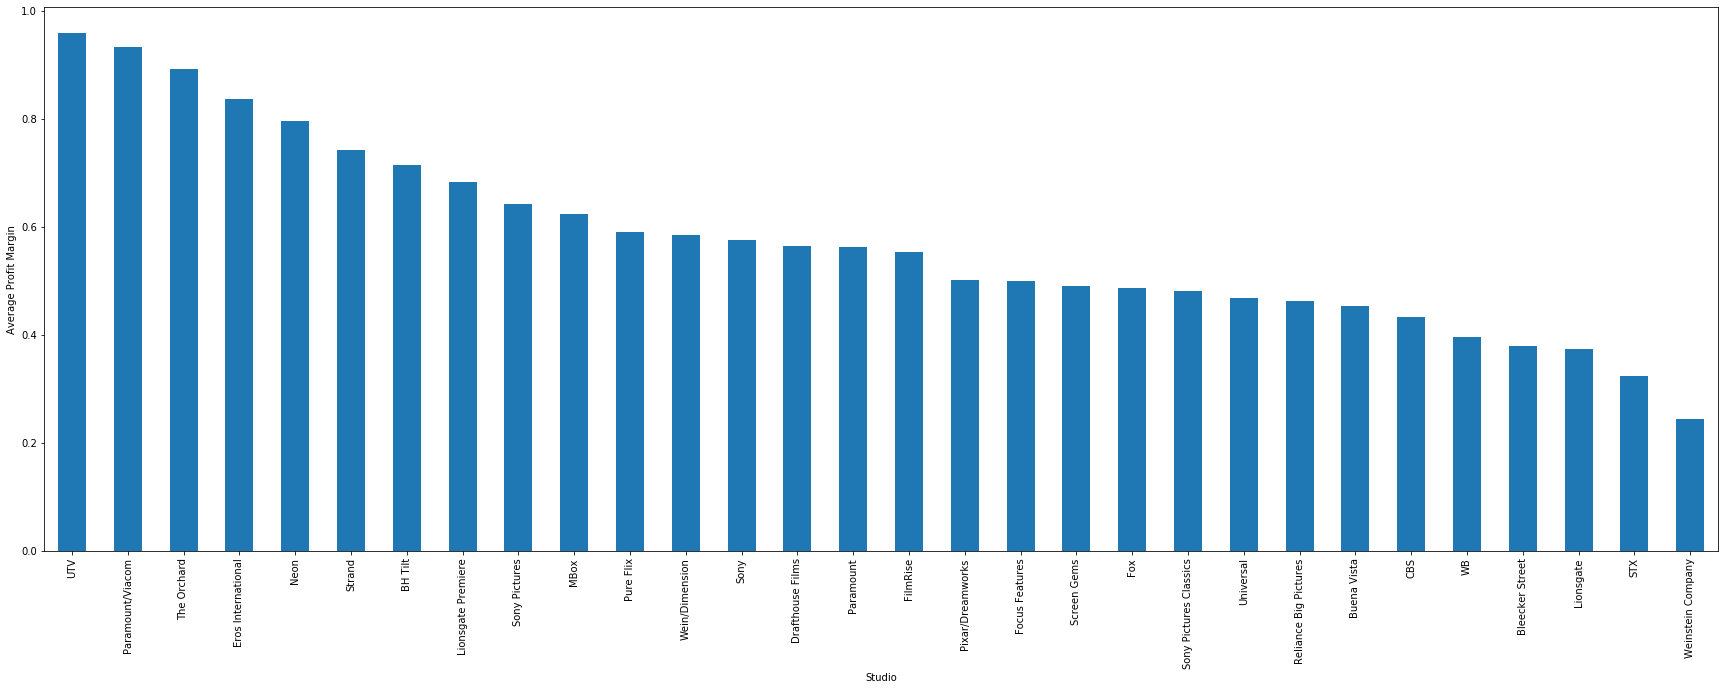

In [218]:

profit_by_studiodf2 = profit_by_studiodf.groupby(['Studio'])['Profit Margin'].mean()

profit_by_studiodf2 = profit_by_studiodf2.sort_values(ascending=False).head(30)

profit_by_studiodf2.plot.bar(figsize=(30,10))

plt.ylabel('Average Profit Margin')
plt.title('Average Profit Margin by Studio')

This is a graph that demonstrates how many studios have negative average profit margins. It is intentionally in this notebook to display the perspective of outliers, and not meant to be read in depth. 

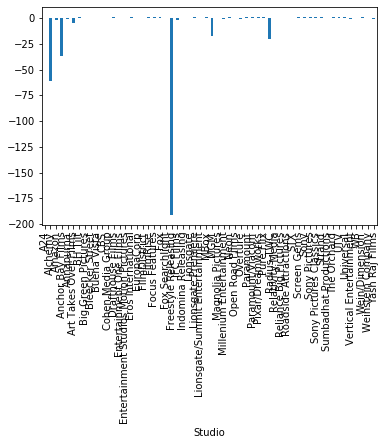

In [174]:
#UGLY GRAPH

profit_by_studiodf2 = profit_by_studiodf.replace(np.nan,0)
profit_by_studiodf2 = profit_by_studiodf.groupby(['Studio'])['Profit Margin'].mean()

profit_by_studiodf2.plot.bar()

Recommendation: Based on this data, our recommendation is to work using the best practicies similar to one of the top 10 Studios by Average profit margin:
        
1.UTV
2.Paramount/Viacom
3.The Orchard
4.Eros International
5.Neon
6.Strand
7.BH Tilt
8.Lionsgate Premiere
9.Sony Pictures
10.Mbox
        
        
        